In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv(r'C:\Users\kgaut\Documents\PROJECTS\House Price\house-prices-advanced-regression-techniques\train.csv')

In [5]:
test = pd.read_csv(r'C:\Users\kgaut\Documents\PROJECTS\House Price\house-prices-advanced-regression-techniques\test.csv')

In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [10]:
df = pd.concat([train,test])

In [11]:
df.shape

(2919, 81)

In [13]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 90)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [15]:
df.select_dtypes(include=['int64','float']).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [16]:
df.select_dtypes(include=['object']).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [17]:
df = df.set_index('Id')

In [19]:
abc = df.isnull().sum()/df.shape[0]*100
abc

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.216855
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
Fence            80.438506
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.068517
GarageArea        0.034258
GarageCars        0.034258
GarageCond        5.447071
GarageFinish      5.447071
GarageQual        5.447071
GarageType        5.378554
G

In [21]:
columns_drop = abc[abc>20].keys()
columns_drop

Index(['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC', 'SalePrice'], dtype='object')

In [24]:
df = df.drop(columns_drop, axis=1)


KeyError: "labels ['Alley' 'Fence' 'FireplaceQu' 'MiscFeature' 'PoolQC' 'SalePrice'] not contained in axis"

In [25]:
df.shape

(2919, 74)

In [26]:
columns = list(df.columns.values)
for i in columns:
    print(i.ljust(25)+"\t"+str(len(df[i].unique())))

1stFlrSF                 	1083
2ndFlrSF                 	635
3SsnPorch                	31
BedroomAbvGr             	8
BldgType                 	5
BsmtCond                 	5
BsmtExposure             	5
BsmtFinSF1               	992
BsmtFinSF2               	273
BsmtFinType1             	7
BsmtFinType2             	7
BsmtFullBath             	5
BsmtHalfBath             	4
BsmtQual                 	5
BsmtUnfSF                	1136
CentralAir               	2
Condition1               	9
Condition2               	8
Electrical               	6
EnclosedPorch            	183
ExterCond                	5
ExterQual                	4
Exterior1st              	16
Exterior2nd              	17
Fireplaces               	5
Foundation               	6
FullBath                 	5
Functional               	8
GarageArea               	604
GarageCars               	7
GarageCond               	6
GarageFinish             	4
GarageQual               	6
GarageType               	7
GarageYrBlt              	104

In [28]:
col_headers = list(df.columns.values)
for i in col_headers:
    print(i)
    print(df[i].unique())
    print("\n")

1stFlrSF
[ 856 1262  920 ... 1778 1650 1960]


2ndFlrSF
[ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  224 1103  560  811  878  574  910  620
  687  546  902 1000 

[ 548.  460.  608.  642.  836.  480.  636.  484.  468.  205.  384.  736.
  352.  840.  576.  516.  294.  853.  280.  534.  572.  270.  890.  772.
  319.  240.  250.  271.  447.  556.  691.  672.  498.  246.    0.  440.
  308.  504.  300.  670.  826.  386.  388.  528.  894.  565.  641.  288.
  645.  852.  558.  220.  667.  360.  427.  490.  379.  297.  283.  509.
  405.  758.  461.  400.  462.  420.  432.  506.  684.  472.  366.  476.
  410.  740.  648.  273.  546.  325.  792.  450.  180.  430.  594.  390.
  540.  264.  530.  435.  453.  750.  487.  624.  471.  318.  766.  660.
  470.  720.  577.  380.  434.  866.  495.  564.  312.  625.  680.  678.
  726.  532.  216.  303.  789.  511.  616.  521.  451. 1166.  252.  497.
  682.  666.  786.  795.  856.  473.  398.  500.  349.  454.  644.  299.
  210.  431.  438.  675.  968.  721.  336.  810.  494.  457.  818.  463.
  604.  389.  538.  520.  309.  429.  673.  884.  868.  492.  413.  924.
 1053.  439.  671.  338.  573.  732.  505.  575.  6

In [29]:
#outlier detection
#box plot and remove values manually
#can remove by considering statistical measures


In [30]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

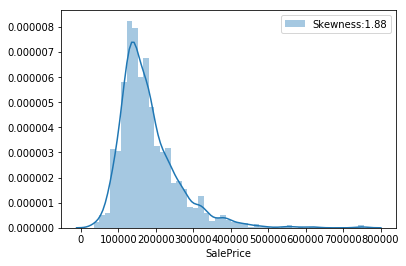

In [32]:
g = sns.distplot(train['SalePrice'])
g = g.legend(['Skewness:{:.2f}'.format(train['SalePrice'].skew())], loc='best')


<function matplotlib.pyplot.show(*args, **kw)>

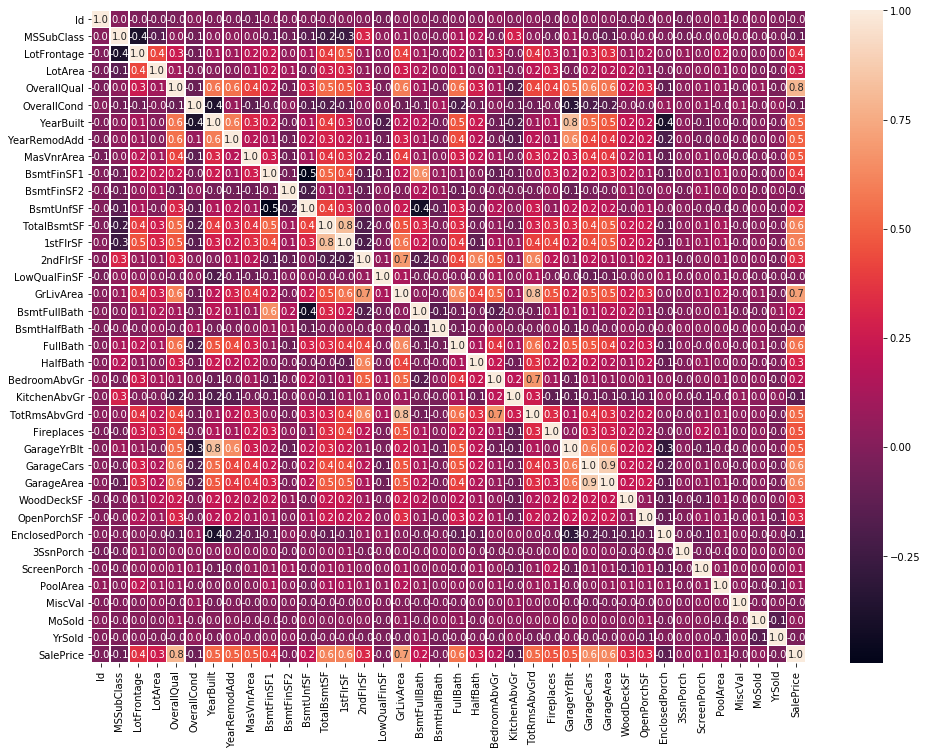

In [34]:
#Correlation
f,ax=plt.subplots(figsize=(16,12))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show

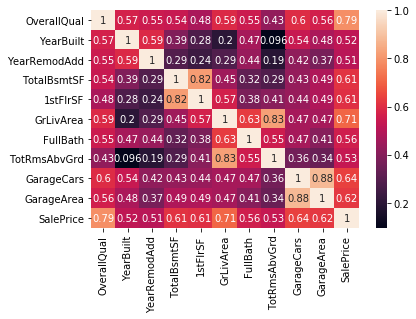

In [38]:
corr_r = train.corr()
top_corr_features = corr_r.index[abs(corr_r['SalePrice'])>0.5]
g = sns.heatmap(train[top_corr_features].corr(), annot=True)

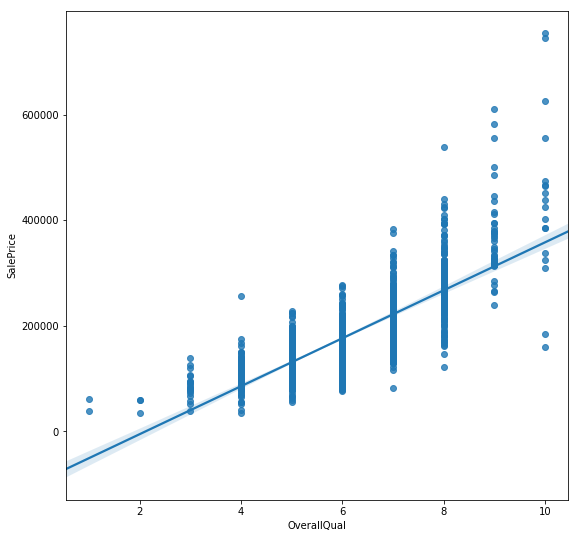

In [39]:
f,ax = plt.subplots(figsize=(9,9))
sns.regplot(data=train, x="OverallQual", y="SalePrice")

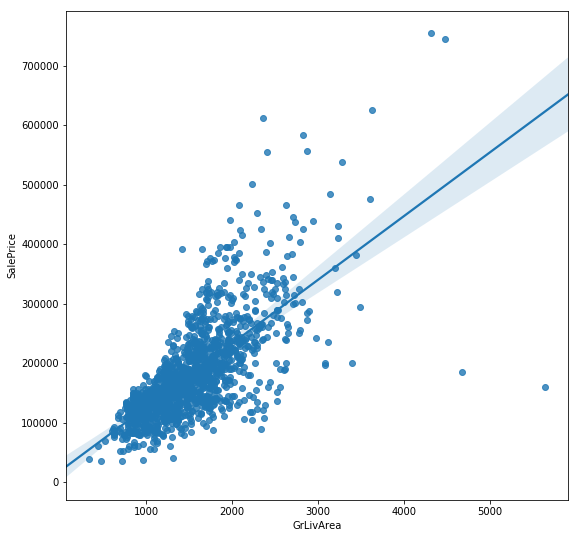

In [40]:
f,ax = plt.subplots(figsize=(9,9))
sns.regplot(data=train, x="GrLivArea", y="SalePrice")

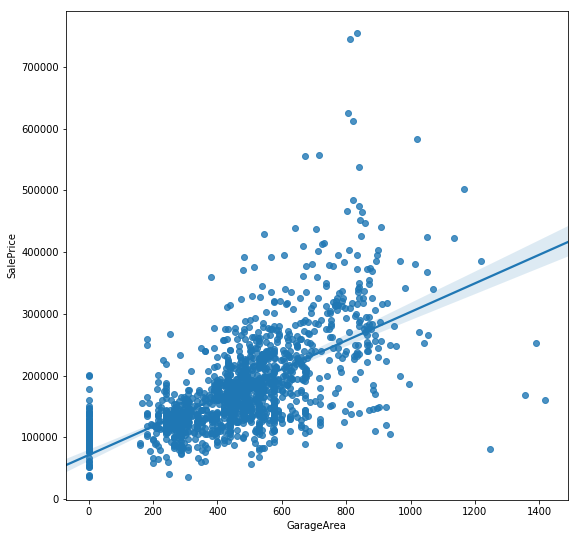

In [41]:
f,ax = plt.subplots(figsize=(9,9))
sns.regplot(data=train, x="GarageArea", y="SalePrice")

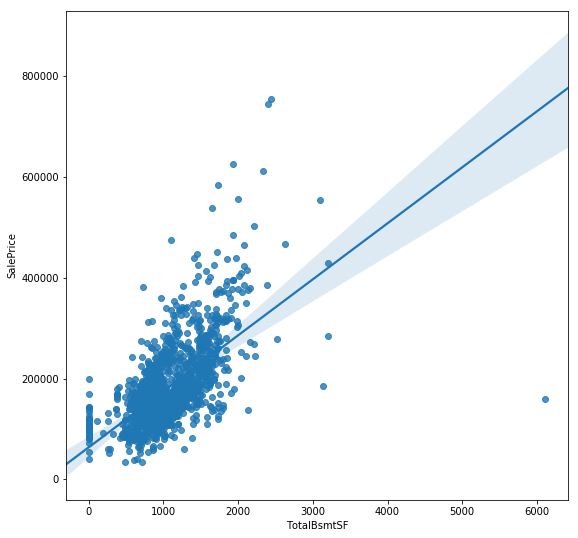

In [42]:
f,ax = plt.subplots(figsize=(9,9))
sns.regplot(data=train, x="TotalBsmtSF", y="SalePrice")

In [43]:
#Missing value imputaion
missing_cols = df.columns[df.isnull().any()]

In [44]:
missing_cols

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [49]:
bsmt_cols = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']

In [50]:
bsmt_feat = df[bsmt_cols]

In [51]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinSF2      2918 non-null float64
BsmtFinType1    2840 non-null object
BsmtFinType2    2839 non-null object
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
BsmtQual        2838 non-null object
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB


In [52]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]
bsmt_feat.shape

(88, 11)

In [53]:
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
40,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
91,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
157,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
183,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
260,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
333,TA,No,1124.0,479.0,GLQ,NaN,1.0,0.0,Gd,1603.0,3206.0
343,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [55]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull()|bsmt_feat.isin([0])).all(1)]

In [56]:
bsmt_feat_all_nan.shape

(79, 11)

In [57]:
bsmt_feat_all_nan

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
40,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
91,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
157,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
183,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
260,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
343,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
363,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [59]:
qual = list(df.loc[:,df.dtypes=="object"].columns.values)
qual

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [63]:
for i in bsmt_cols:
    if i in qual:
        bsmt_feat_all_nan[i]=bsmt_feat_all_nan[i].replace(np.nan,'NA')
    else:
        bsmt_feat_all_nan[i]=bsmt_feat_all_nan[i].replace(np.nan,0)
        bsmt_feat.update(bsmt_feat_all_nan)
        df.update(bsmt_feat_all_nan)
            

In [65]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]

In [66]:
bsmt_feat.shape

(9, 11)

In [67]:
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())

1526.0
0.0


In [69]:
pd.cut(range(0,1526),5)

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] < (915.0, 1220.0] < (1220.0, 1525.0]]

In [70]:
df_slice=df[(df['BsmtFinSF2']>=305)&(df['BsmtFinSF2']<=610)]

In [71]:
bsmt_feat.at[333,'BsmtFinType2']=df_slice['BsmtFinType2'].mode()[0]

In [72]:
bsmt_feat['BsmtExposure']=bsmt_feat['BsmtExposure'].replace(np.nan, df[df['BsmtQual']=='Gd']['BsmtExposure'].mode()[0])

In [74]:
bsmt_feat['BsmtCond']=bsmt_feat['BsmtCond'].replace(np.nan,df['BsmtCond'].mode()[0])

In [75]:
bsmt_feat['BsmtQual']=bsmt_feat['BsmtQual'].replace(np.nan,df['BsmtQual'].mode()[0])

In [76]:
df.update(bsmt_feat)

In [77]:
df.columns[df.isnull().any()]

Index(['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'SaleType', 'Utilities'],
      dtype='object')

In [78]:
garage_cols = ['GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt']

In [79]:
garage_feat = df[garage_cols]

In [82]:
garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]
garage_feat.shape

(159, 7)

In [83]:
gar_feat_all_nan = garage_feat[(garage_feat.isnull()|garage_feat.isin([0])).all(1)]

In [85]:
gar_feat_all_nan.shape

(157, 7)

In [86]:
for i in garage_cols:
    if i in qual:
        gar_feat_all_nan[i]=gar_feat_all_nan[i].replace(np.nan,'NA')
    else:
        gar_feat_all_nan[i]=gar_feat_all_nan[i].replace(np.nan,0)
garage_feat.update(gar_feat_all_nan)
df.update(gar_feat_all_nan)
        
    

In [87]:
garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]

In [88]:
garage_feat

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
2127,360.0,1.0,NaN,NaN,NaN,Detchd,NaN
2577,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


In [89]:
for i in garage_cols:
    garage_feat[i]=garage_feat[i].replace(np.nan, df[df['GarageType']=='Detchd'][i].mode()[0])

In [90]:
df.update(garage_feat)

In [91]:
df.columns[df.isnull().any()]

Index(['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
       'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'SaleType',
       'Utilities'],
      dtype='object')

In [102]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])


In [103]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [104]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [105]:
df[df['MasVnrArea'].isnull()==True]['MasVnrType'].unique()

array([], dtype=object)

In [106]:
df.loc[(df['MasVnrType']=='None')&(df['MasVnrArea'].isnull()==True), 'MasVnrArea']=0

In [112]:
df.isnull().sum()/df.shape[0]*100

1stFlrSF         0.0
2ndFlrSF         0.0
3SsnPorch        0.0
BedroomAbvGr     0.0
BldgType         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
BsmtQual         0.0
BsmtUnfSF        0.0
CentralAir       0.0
Condition1       0.0
Condition2       0.0
Electrical       0.0
EnclosedPorch    0.0
ExterCond        0.0
ExterQual        0.0
Exterior1st      0.0
Exterior2nd      0.0
Fireplaces       0.0
Foundation       0.0
FullBath         0.0
Functional       0.0
GarageArea       0.0
GarageCars       0.0
GarageCond       0.0
GarageFinish     0.0
GarageQual       0.0
GarageType       0.0
GarageYrBlt      0.0
GrLivArea        0.0
HalfBath         0.0
Heating          0.0
HeatingQC        0.0
HouseStyle       0.0
KitchenAbvGr     0.0
KitchenQual      0.0
LandContour      0.0
LandSlope        0.0
LotArea          0.0
LotConfig        0.0
LotFrontage      0.0
LotShape     

In [111]:
lotconfig = ['Corner', 'Inside', 'CulDSac','FR2','FR3']
for i in lotconfig:
    df['LotFrontage']=pd.np.where((df['LotFrontage'].isnull()==True)&(df['LotConfig']==i), df[df['LotConfig']==i]['LotFrontage'].mean(), df['LotFrontage'])

In [114]:
#feature transformation
convert_cols = ['MSSubClass','YearBuilt','YearRemodAdd', 'GarageYrBlt','YrSold']
for i in convert_cols:
    df[i]=df[i].astype(str)

In [115]:
import calendar

In [119]:
df['MoSold']=df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [120]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [121]:
quan = list(df.loc[:,df.dtypes !='object'].columns.values)

In [122]:
quan

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [123]:
#ordered data
df['BsmtCond']=df['BsmtCond'].astype('category', categories=['NA', 'Po','Fa','TA','Gd','Ex'], ordered=True).cat.codes

In [124]:
df['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int64)

In [125]:
df['BsmtExposure']=df['BsmtExposure'].astype('category', categories=['NA', 'Mn','Av','Gd'], ordered=True).cat.codes

In [126]:
df['BsmtFinType1']=df['BsmtFinType1'].astype('category', categories=['NA', 'Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True).cat.codes

In [127]:
df['BsmtFinType2']=df['BsmtFinType2'].astype('category', categories=['NA', 'Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True).cat.codes

In [129]:
df['BsmtQual']=df['BsmtQual'].astype('category', categories=['NA', 'Po','Fa','TA','Gd','Ex'], ordered=True).cat.codes

In [130]:
df['ExterQual']=df['ExterQual'].astype('category', categories=['Po','Fa','TA','Gd','Ex'], ordered=True).cat.codes

In [131]:
df['ExterCond']=df['ExterCond'].astype('category', categories=['Po','Fa','TA','Gd','Ex'], ordered=True).cat.codes

In [132]:
df['Functional']=df['Functional'].astype('category', categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], ordered=True).cat.codes

In [133]:
df['GarageCond']=df['GarageCond'].astype('category', categories=['Po','Fa','TA','Gd','Ex'], ordered=True).cat.codes

In [134]:
df['GarageQual']=df['GarageQual'].astype('category', categories=['Po','Fa','TA','Gd','Ex'], ordered=True).cat.codes

In [135]:
df['GarageFinish']=df['GarageFinish'].astype('category', categories=['Na','Unf','RFn','Fin'], ordered=True).cat.codes

In [136]:
df['HeatingQC']=df['HeatingQC'].astype('category', categories=['Po','Fa','TA','Gd','Ex'], ordered=True).cat.codes

In [137]:
df['KitchenQual']=df['KitchenQual'].astype('category', categories=['Po','Fa','TA','Gd','Ex'], ordered=True).cat.codes

In [138]:
df['PavedDrive']=df['PavedDrive'].astype('category', categories=['N','P','Y'], ordered=True).cat.codes

In [139]:
df['Utilities']=df['Utilities'].astype('category', categories=['ELO','NASeWa','NASewr','AllPub'], ordered=True).cat.codes

In [140]:
skewed_features = ['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

1stFlrSF


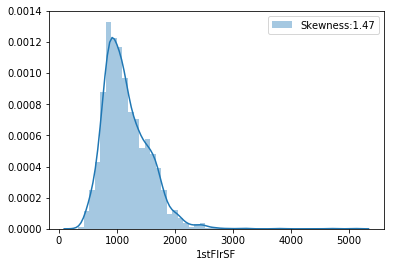

2ndFlrSF


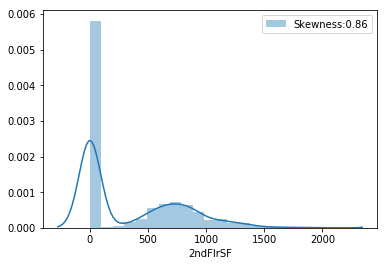

3SsnPorch


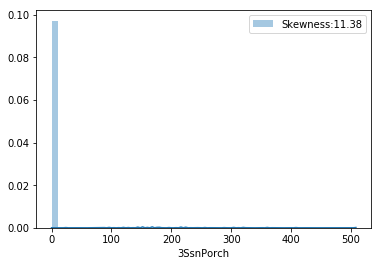

BedroomAbvGr


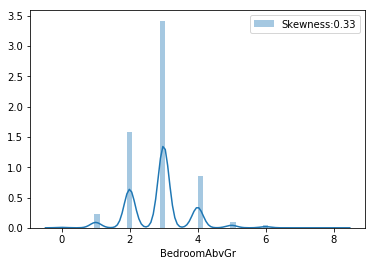

BsmtFinSF1


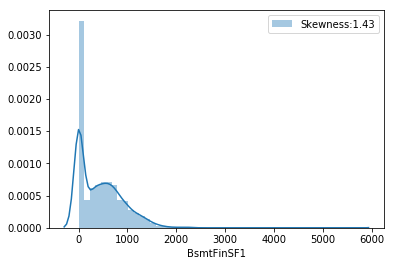

BsmtFinSF2


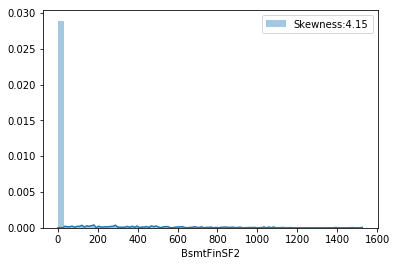

BsmtFullBath


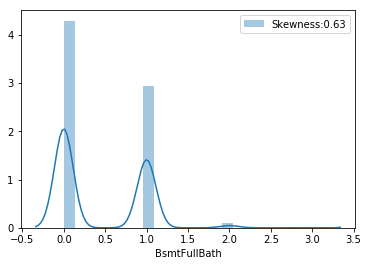

BsmtHalfBath


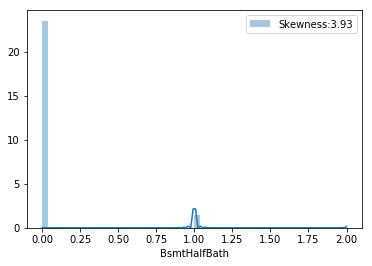

BsmtUnfSF


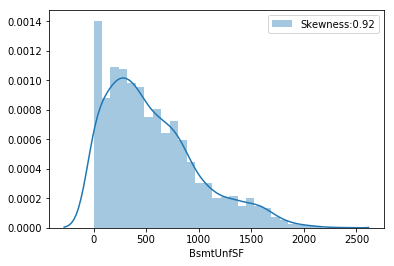

EnclosedPorch


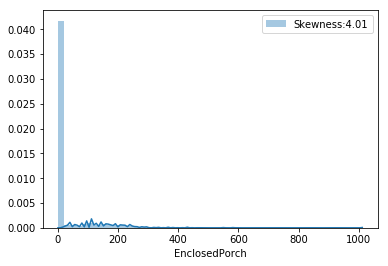

Fireplaces


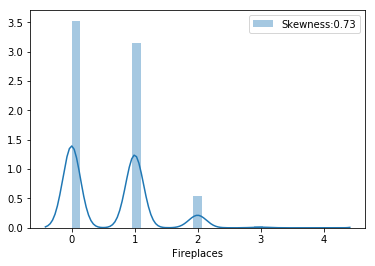

FullBath


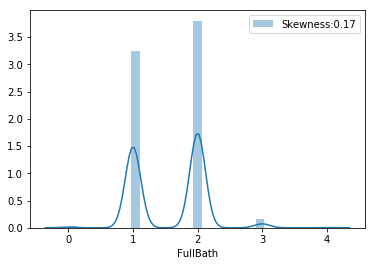

GarageArea


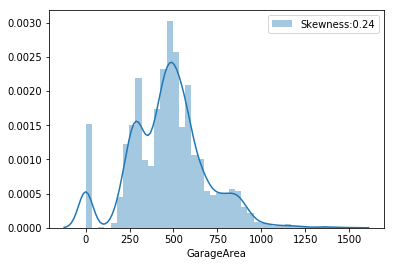

GarageCars


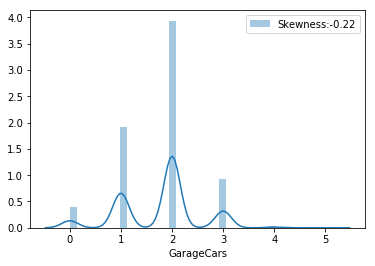

GrLivArea


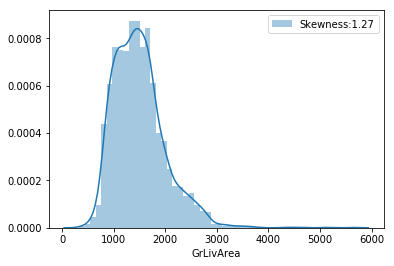

HalfBath


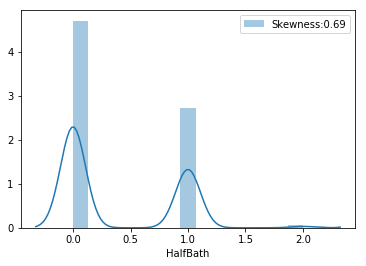

KitchenAbvGr


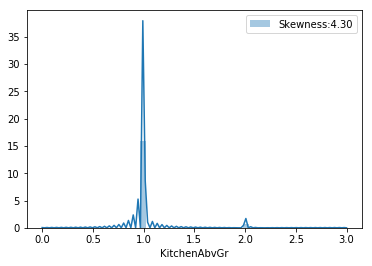

LotArea


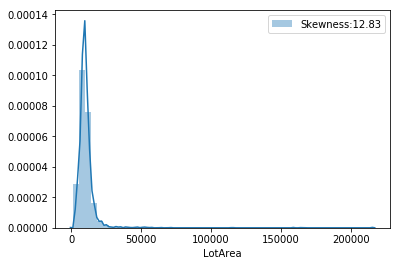

LotFrontage


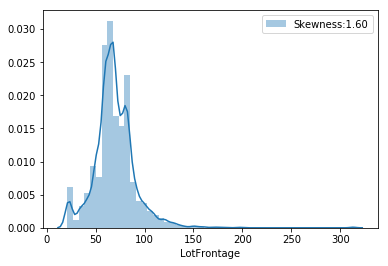

LowQualFinSF


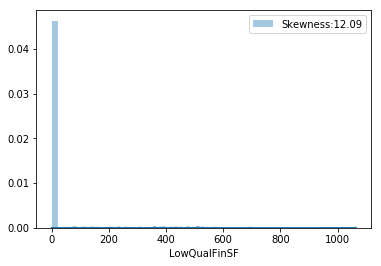

MasVnrArea


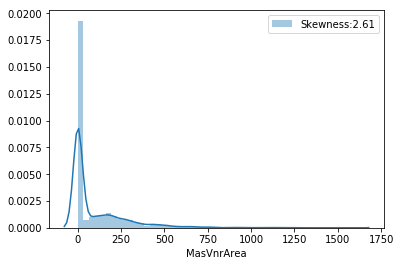

MiscVal


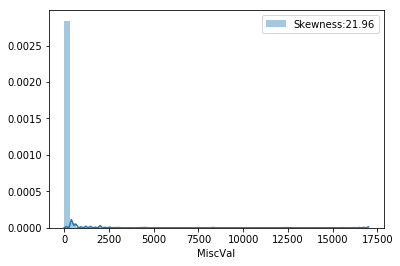

OpenPorchSF


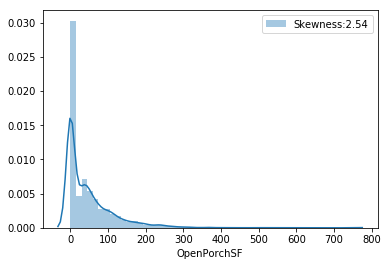

PoolArea


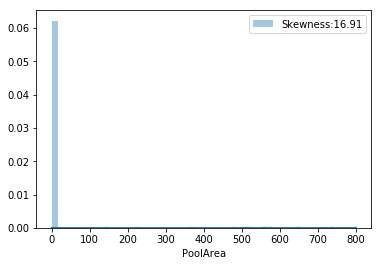

ScreenPorch


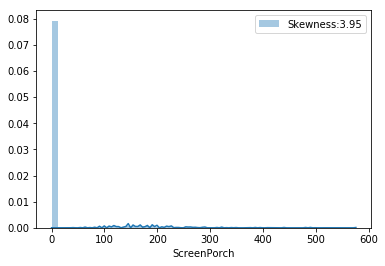

TotRmsAbvGrd


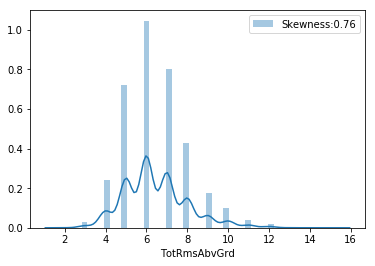

TotalBsmtSF


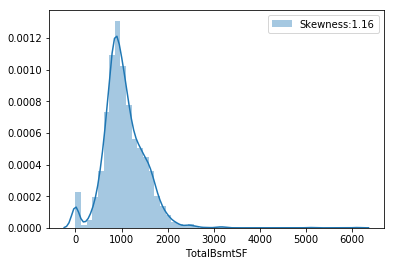

WoodDeckSF


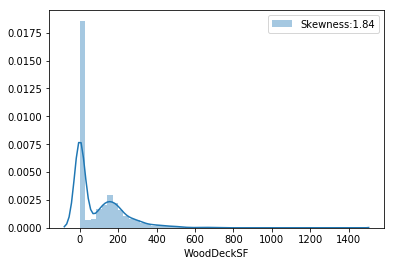

In [142]:
for i in skewed_features:
    print(i)
    g = sns.distplot(df[i])
    g = g.legend(['Skewness:{:.2f}'.format(df[i].skew())], loc='best')
    plt.show()

In [143]:
# Remove Skewness
for i in skewed_features:
    df[i]=np.log(df[i]+1)

In [144]:
SalePrice = np.log(train['SalePrice']+1)

In [145]:
# create dummies for all non ordinal categorical data
qual = list(df.loc[:,df.dtypes=='object'].columns.values)
len(qual)

29

In [146]:
df = pd.get_dummies(df, columns=qual)

In [147]:
df.shape

(2919, 530)

In [149]:
# Normalize
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [150]:
scaler.fit(df)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [151]:
df = scaler.transform(df)

In [152]:
#modeling
#split data
train_len = len(train)
X_train = df[:train_len]
X_test = df[train_len:]

In [153]:
Y_train = SalePrice

In [156]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [163]:
def test_model(model):
    cv = KFold(n_splits=3, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, Y_train , cv=cv, scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [164]:
import sklearn.linear_model as linear_model

In [165]:
LR = linear_model.LinearRegression()
test_model(LR)

[-2.1933536748508419e+18]

In [166]:
Rid = linear_model.Ridge()
test_model(Rid)

[0.867233668239156]

In [168]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8722166208841043]

In [169]:
# ensemble models
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

In [170]:
GB = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=10)

In [171]:
test_model(GB)

[0.8799332416297694]

In [173]:
BR = BaggingRegressor(base_estimator=None, n_estimators=1000, random_state=10)
test_model(BR)

[0.8569801070789659]

In [176]:
GB.fit(X_train, Y_train)
Y_predict = np.expm1(GB.predict(X_test)).round(2)

In [177]:
Y_predict[:5]

array([114892.08, 165093.94, 190613.84, 194884.47, 192094.18])